In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import datetime
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
import tqdm

from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv('data/merged_221220_221231.csv')
data['gasPrice'] = data['gasPrice'] / 10 ** 9
data.head()

,tx_hash,from,to,gas,gasPrice,blockNumber,timestamp_x,miner,timestamp_y,waiting,validator,public_key,validator_name,validator_address,pub_key_lido_status
0,0x14e970dba71ef93b42f337d3494c4d6e8fee4d83ce38...,0x498B859D2e59958E209d7DD262324C8D31b12B12,0xC1E088fC1323b20BCBee9bd1B9fC9546db5624C5,242494,117.114005,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN
1,0x33fcc824c05553a3ec31a7d71dc6dbb26cf51d608009...,0x07B873DE48807ec7B02B38cc31b4f96a6A507182,0x883B01205b938EC7268286d13Cb40a2045D2E78F,800000,23.932889,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN
2,0x555ffb08812804e23fe18467886edaa167f502488c6b...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,305170,17.248596,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN
3,0x9febfdc63677cd0decb532cb049004add2959d7f1a1f...,0xf7C8133baEa3313993B3c476c016aa869C991679,0x91c8D7e4080bed28e26FCE1b87cACcFaF7bbF794,292432,18.212433,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,1.671484e+09,3.0,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN
4,0xe24c2fb8e8d581d86710a0ca685e27ed6c36ca722d8e...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,245026,20.798797,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN


# 1. Количество транзакций Lido/ Non Lido

In [3]:
data.shape

(11527423, 15)

In [4]:
print(f"Total number of unique validators {data['validator'].nunique()}")
print(f"Total number of unique validators public keys {data['public_key'].nunique()}")
print(f"Total number of blocks {data['blockNumber'].nunique()}")

Total number of unique validators 78754
Total number of unique validators public keys 78754
Total number of blocks 85944


In [5]:
data['validator_type'] = 'Lido'
data.loc[data['validator_name'].isna(), 'validator_type'] = 'Non Lido'

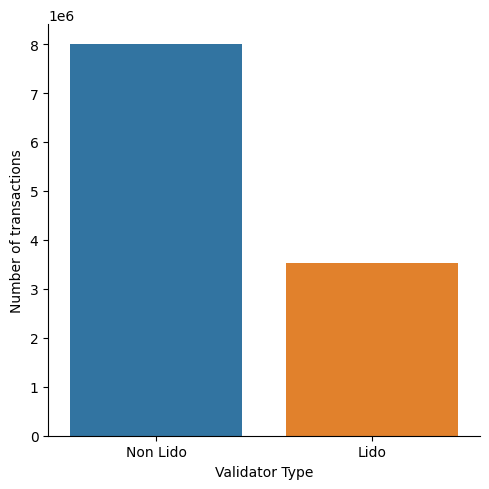

In [6]:
g = sns.catplot(data=data, x="validator_type", kind="count")
g.set(ylabel='Number of transactions', xlabel='Validator Type')
plt.show()

In [7]:
data['eth_datetime'] = pd.to_datetime(data['timestamp_x'], unit='s')
data['eth_hour'] = [datetime(x.year, x.month, x.day, x.hour) for x in data['eth_datetime'].tolist()]
data.head()

,tx_hash,from,to,gas,gasPrice,blockNumber,timestamp_x,miner,timestamp_y,waiting,validator,public_key,validator_name,validator_address,pub_key_lido_status,validator_type,eth_datetime,eth_hour
0,0x14e970dba71ef93b42f337d3494c4d6e8fee4d83ce38...,0x498B859D2e59958E209d7DD262324C8D31b12B12,0xC1E088fC1323b20BCBee9bd1B9fC9546db5624C5,242494,117.114005,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00
1,0x33fcc824c05553a3ec31a7d71dc6dbb26cf51d608009...,0x07B873DE48807ec7B02B38cc31b4f96a6A507182,0x883B01205b938EC7268286d13Cb40a2045D2E78F,800000,23.932889,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00
2,0x555ffb08812804e23fe18467886edaa167f502488c6b...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,305170,17.248596,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00
3,0x9febfdc63677cd0decb532cb049004add2959d7f1a1f...,0xf7C8133baEa3313993B3c476c016aa869C991679,0x91c8D7e4080bed28e26FCE1b87cACcFaF7bbF794,292432,18.212433,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,1.671484e+09,3.0,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00
4,0xe24c2fb8e8d581d86710a0ca685e27ed6c36ca722d8e...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,245026,20.798797,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00


In [8]:
hour_data = pd.pivot_table(data[['eth_hour', 'validator_type', 'gasPrice', 'tx_hash']],
                           index='eth_hour', values=['gasPrice', 'tx_hash'],
                           aggfunc={'tx_hash': 'count', 'gasPrice': 'mean'},
                           columns='validator_type')

In [9]:
hour_data

gasPrice            tx_hash         
validator_type            Lido   Non Lido    Lido Non Lido
eth_hour                                                  
2022-12-19 21:00:00  21.253256  21.085744   14807    29028
2022-12-19 22:00:00  25.985921  27.149318   12011    32153
2022-12-19 23:00:00  19.253743  19.081004   14436    28034
2022-12-20 00:00:00  17.140613  16.753229   11058    29665
2022-12-20 01:00:00  17.354385  16.370288   11576    27925
...                        ...        ...     ...      ...
2022-12-31 16:00:00  23.246663  23.384683   13275    27800
2022-12-31 17:00:00  17.965450  17.899954   11530    29823
2022-12-31 18:00:00  19.766482  19.191375   12078    26422
2022-12-31 19:00:00  17.776543  18.416145   11489    27614
2022-12-31 20:00:00  17.899185  17.665073   12623    25833

[288 rows x 4 columns]

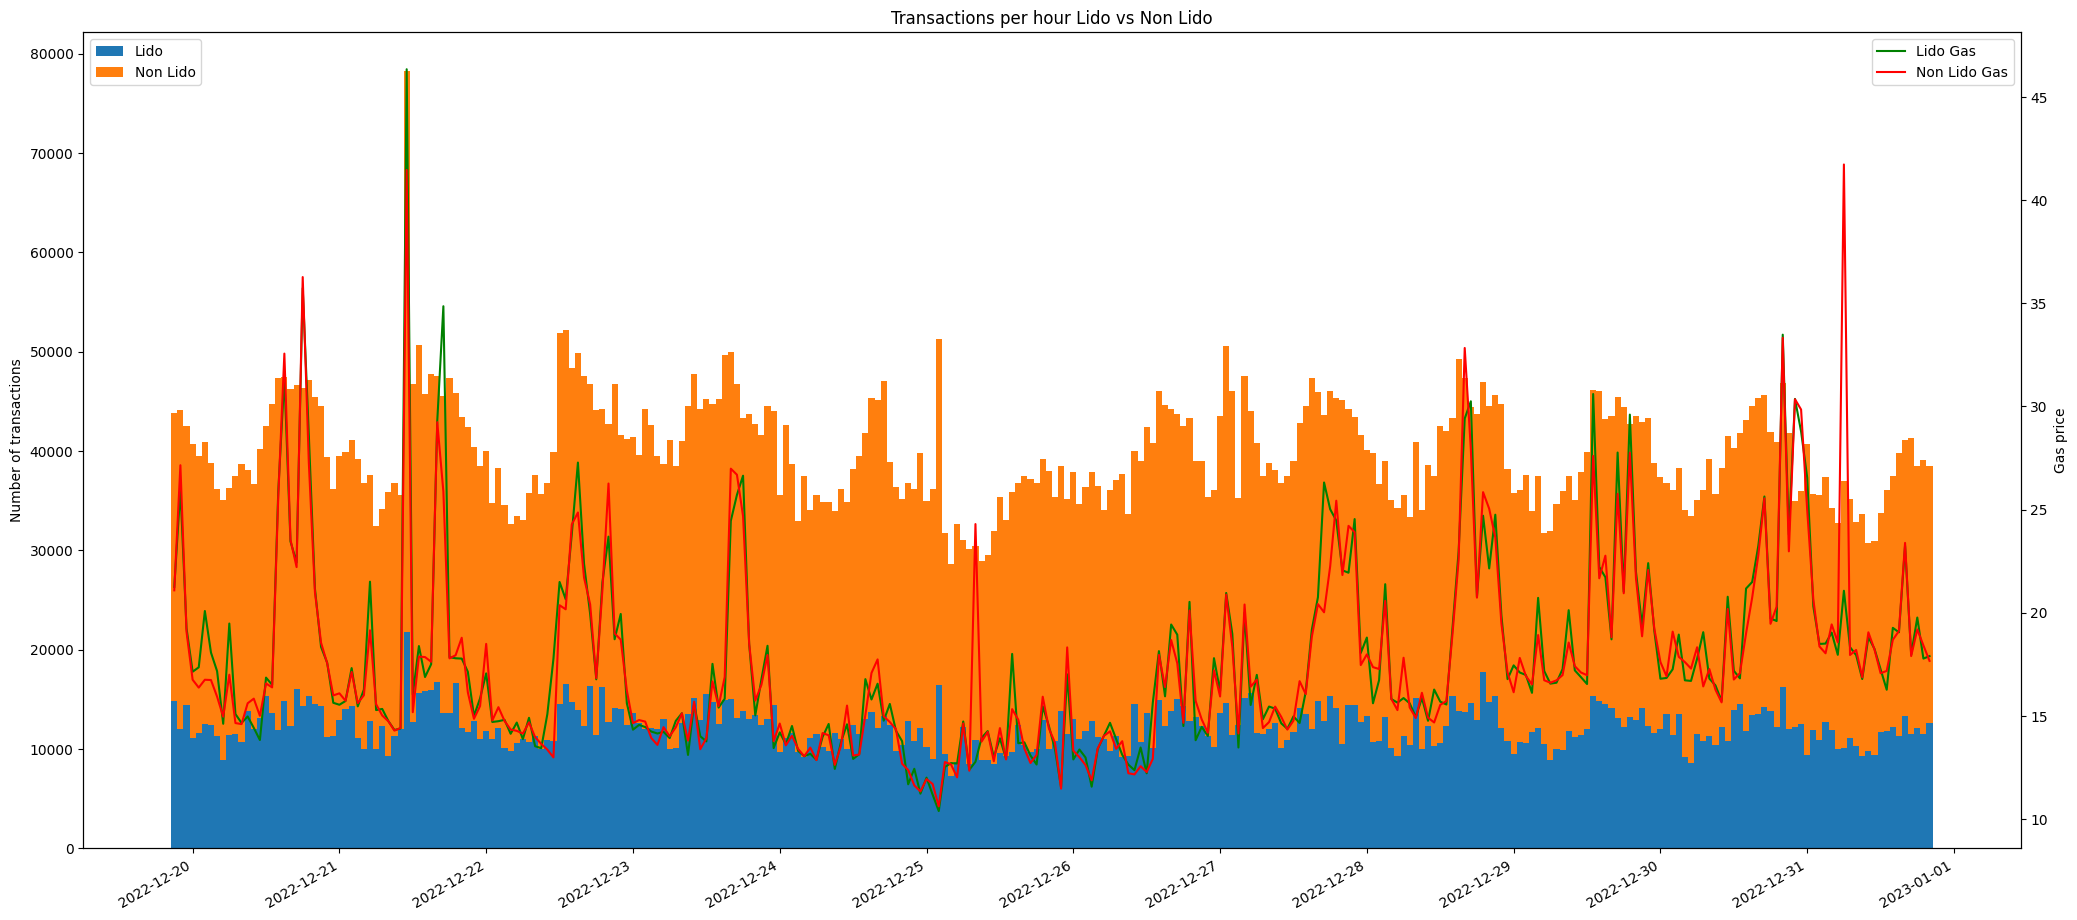

In [10]:
import matplotlib.dates as mdates

_ = plt.figure(figsize=(25, 12))
ax = plt.subplot()

width = 1.0 / 24
ax.bar(hour_data.index, hour_data['tx_hash']['Lido'], width, label='Lido')
ax.bar(hour_data.index, hour_data['tx_hash']['Non Lido'], width, bottom=hour_data['tx_hash']['Lido'],
       label='Non Lido')

ax_gas = ax.twinx()
ax_gas.plot(hour_data.index, hour_data['gasPrice']['Lido'], label='Lido Gas', color='green')
ax_gas.plot(hour_data.index, hour_data['gasPrice']['Non Lido'], label='Non Lido Gas', color='red')

ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.title('Transactions per hour Lido vs Non Lido')
plt.xlabel('Date')
ax.set_ylabel('Number of transactions')
ax_gas.set_ylabel('Gas price')
ax.legend(loc=2)
ax_gas.legend(loc=0)
plt.show()

# 2. Посмотрим на поле to

In [5]:
print(f'Total number of unique addresses "to": {data["to"].nunique()}')

Total number of unique addresses "to": 1469577


In [3]:
from web3 import Web3, IPCProvider

geth_ipc = '/media/Warehouse/Warehouse/Ethereum/data/.ethereum/geth.ipc'
w3 = Web3(IPCProvider(geth_ipc))
# Check
print ("Latest Ethereum block number" , w3.eth.blockNumber)

Latest Ethereum block number 16461024


In [13]:
contracts = []
contracts_codelen = []
for address in tqdm.tqdm(data["to"].unique()):
    if type(address) is not str:
        continue
    code = w3.eth.get_code(address)
    if len(code) > 0:
        contracts.append(address)
        contracts_codelen.append(len(code))

100%|█████████████████████████████████████████████████████████████████████| 1469578/1469578 [19:02<00:00, 1286.53it/s]


In [14]:
print(f'Total number of contracts: {len(contracts)}')

Total number of contracts: 110495


In [15]:
contracts_set = set(contracts)
data['is_contract_transaction'] = data['to'].apply(lambda x: x in contracts_set)
data.head()

,tx_hash,from,to,gas,gasPrice,blockNumber,timestamp_x,miner,timestamp_y,waiting,validator,public_key,validator_name,validator_address,pub_key_lido_status,validator_type,eth_datetime,eth_hour,is_contract_transaction
0,0x14e970dba71ef93b42f337d3494c4d6e8fee4d83ce38...,0x498B859D2e59958E209d7DD262324C8D31b12B12,0xC1E088fC1323b20BCBee9bd1B9fC9546db5624C5,242494,117.114005,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True
1,0x33fcc824c05553a3ec31a7d71dc6dbb26cf51d608009...,0x07B873DE48807ec7B02B38cc31b4f96a6A507182,0x883B01205b938EC7268286d13Cb40a2045D2E78F,800000,23.932889,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True
2,0x555ffb08812804e23fe18467886edaa167f502488c6b...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,305170,17.248596,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True
3,0x9febfdc63677cd0decb532cb049004add2959d7f1a1f...,0xf7C8133baEa3313993B3c476c016aa869C991679,0x91c8D7e4080bed28e26FCE1b87cACcFaF7bbF794,292432,18.212433,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,1.671484e+09,3.0,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True
4,0xe24c2fb8e8d581d86710a0ca685e27ed6c36ca722d8e...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,245026,20.798797,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True


In [4]:
data = data.drop_duplicates()
len(data)

11527306

In [6]:
data.to_csv('data/merged_221220_221231_with_contracts.csv', index=False)

In [3]:
data = pd.read_csv('data/merged_221220_221231_with_contracts.csv')
data.head()

,tx_hash,from,to,gas,gasPrice,blockNumber,timestamp_x,miner,timestamp_y,waiting,validator,public_key,validator_name,validator_address,pub_key_lido_status,validator_type,eth_datetime,eth_hour,is_contract_transaction
0,0x14e970dba71ef93b42f337d3494c4d6e8fee4d83ce38...,0x498B859D2e59958E209d7DD262324C8D31b12B12,0xC1E088fC1323b20BCBee9bd1B9fC9546db5624C5,242494,117.114005,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True
1,0x33fcc824c05553a3ec31a7d71dc6dbb26cf51d608009...,0x07B873DE48807ec7B02B38cc31b4f96a6A507182,0x883B01205b938EC7268286d13Cb40a2045D2E78F,800000,23.932889,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True
2,0x555ffb08812804e23fe18467886edaa167f502488c6b...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,305170,17.248596,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True
3,0x9febfdc63677cd0decb532cb049004add2959d7f1a1f...,0xf7C8133baEa3313993B3c476c016aa869C991679,0x91c8D7e4080bed28e26FCE1b87cACcFaF7bbF794,292432,18.212433,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,1.671484e+09,3.0,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True
4,0xe24c2fb8e8d581d86710a0ca685e27ed6c36ca722d8e...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,245026,20.798797,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True


In [10]:
data.columns

Index(['Unnamed: 0', 'tx_hash', 'from', 'to', 'gas', 'gasPrice', 'blockNumber',
       'timestamp_x', 'miner', 'timestamp_y', 'waiting', 'validator',
       'public_key', 'validator_name', 'validator_address',
       'pub_key_lido_status', 'validator_type', 'eth_datetime', 'eth_hour',
       'is_contract_transaction'],
      dtype='object')

In [11]:
data['blockNumber'].min()

16221291

In [12]:
data['blockNumber'].max()

16307292

## А много ли транзакций с контрактами?

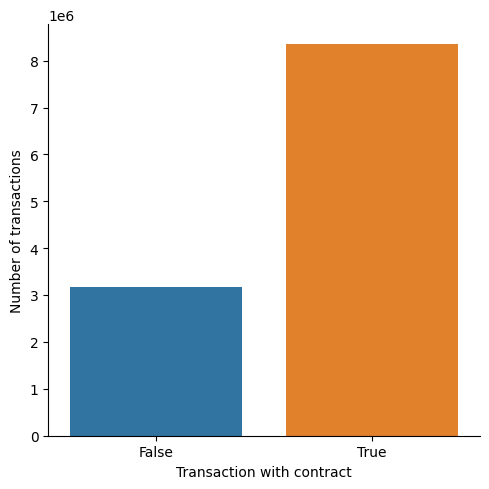

In [5]:
g = sns.catplot(data=data, x="is_contract_transaction", kind="count")
g.set(ylabel='Number of transactions', xlabel='Transaction with contract')
plt.show()

## Посмотрим сколько есть значимых контрактов

In [7]:
contracts_df = pd.DataFrame(data[data['is_contract_transaction']]['to'].value_counts())
contracts_df = contracts_df.reset_index().rename({'index': 'contract', 'to': 'transactions'}, axis=1)
contracts_df

,contract,transactions
0,0xdAC17F958D2ee523a2206206994597C13D831ec7,1042798
1,0x00000000006c3852cbEf3e08E8dF289169EdE581,564820
2,0x68b3465833fb72A70ecDF485E0e4C7bD8665Fc45,467017
3,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,273982
4,0x7a250d5630B4cF539739dF2C5dAcb4c659F2488D,224322
...,...,...
110490,0x96c75BfA74C82145a5646e5fB8cd70Cd1740ff2B,1
110491,0x8708E21b6470249be6AeC5059C3C51199ED6FE57,1
110492,0xb62435dd31d27277a5A736657c288242969ba504,1
110493,0xdB56c0D8198cd459604EcdE065596923A03e075a,1


In [19]:
sum(contracts_df['transactions'].values[30000:]) / contracts_df['transactions'].sum()

0.014646019239680504

In [20]:
contracts_df[contracts_df['transactions'] < 1000]['transactions'].sum()

1799238

In [23]:
contracts_df.to_csv('contracts_221220_221231.csv', index=False)

In [5]:
contracts_df = pd.read_csv('contracts_221220_221231.csv')
contracts_df.head()

,contract,transactions
0,0xdAC17F958D2ee523a2206206994597C13D831ec7,1042798
1,0x00000000006c3852cbEf3e08E8dF289169EdE581,564820
2,0x68b3465833fb72A70ecDF485E0e4C7bD8665Fc45,467017
3,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,273982
4,0x7a250d5630B4cF539739dF2C5dAcb4c659F2488D,224322


In [6]:
contracts_df.shape

(110495, 2)

## Загрузим ABI (получаем отдельным скриптом - gather_contracts_abi.py)

In [7]:
with open('contracts_abi.pickle', 'rb') as f:
    contract_abi = pickle.load(f)

In [8]:
len(contract_abi)

110495

In [9]:
contract_abi_db = {}
for k, v in contract_abi.items():
    if v == ['JSONDecodeError',
             'Contract source code not verified']:
        contract_abi_db[k] = {
            'available': False,
            'reason': v
        }
        continue
    contract_abi_db[k] = {
            'available': True,
            'abi': v
        }
len(contract_abi_db)

110495

In [15]:
with open('contracts_db.pickle', 'wb') as f:
    pickle.dump(contract_abi_db, f)

In [15]:
import re

types_to_skip = [
                 # 'bytes', 'bytes[]', 'bytes2', 'bytes2[]', 'bytes32', 'bytes32[]', 'bytes32[][]',
                 # 'int64', 'int128',
                 # 'int64[]', 'int128[]',
                 # 'uint8', 'uint16', 'uint24', 'uint32', 'uint40', 'uint48', 'uint64',
                 # 'uint96', 'uint120', 'uint128', 'uint224', 'uint256',
                 # 'uint8[]', 'uint16[]', 'uint24[]', 'uint32[]', 'uint40[]', 'uint48[]', 'uint64[]',
                 # 'uint96[]', 'uint120[]', 'uint128[]', 'uint224[]', 'uint256[]',
                 'bool', 'bool[]',
                 'string', 'string[]']

tuple_array_1 = re.compile('tuple\[[\d]*\]$')
tuple_array_2 = re.compile('tuple\[[\d]*\]\[[\d]*\]$')
address_array_1 = re.compile('address\[[\d]*\]$')

def get_addresses_from_tuple(arg, param):
    # print('Parsing tuple')
    # print(f'LEN arg {len(arg["components"])}')
    # for i, c in enumerate(arg['components']):
    #     print(f'Component {i}: {c}')
    # print(f'LEN param {len(param)}')
    # for i, c in enumerate(param):
    #     print(f'Param {i}: {c}')
    # print('\n')
    # # Разбираем компоненты
    addresses = []
    for i in range(len(arg['components'])):
        # print(f'PARSING COMPONENT {i}')
        # print('component:')
        component = arg['components'][i]
        # print(component)
        # print('param:')
        comp_arg = param[i]
        # print(comp_arg)
        if component['type'] == 'address':
            addresses.append(comp_arg)
        # elif component['type'] == 'address[]':
        elif address_array_1.match(component['type']):
            addresses.extend(comp_arg)
        elif component['type'] == 'tuple':
            comp_addresses = get_addresses_from_tuple(component, comp_arg)
            addresses.extend(comp_addresses)
        # elif component['type'] == 'tuple[]':
        elif tuple_array_1.match(component['type']):
            # print(f'get_addresses_from_tuple - tuple_array_1: {comp_arg}')
            for comp_arg_v in comp_arg:
                comp_addresses = get_addresses_from_tuple(component, comp_arg_v)
                addresses.extend(comp_addresses)
        # elif component['type'] == 'tuple[][]':
        elif tuple_array_2.match(component['type']):
            # print(f'get_addresses_from_tuple - tuple_array_2: {comp_arg}')
            for comp_arg_v in comp_arg:
                for comp_arg_vv in comp_arg_v:
                    comp_addresses = get_addresses_from_tuple(component, comp_arg_vv)
                    addresses.extend(comp_addresses)
        elif component['type'] in types_to_skip:
            pass
        elif 'int' in component['type']:
            pass
        elif 'bytes' in component['type']:
            pass
        elif 'bool' in component['type']:
            pass
        elif 'string' in component['type']:
            pass
        else:
            # print(f'New type: {component["type"]}')
            raise Exception(f'get_addresses_from_tuple - {component["type"]}')
        
    return addresses

def get_addresses_from_param(arg, param):
    if arg['type'] == 'address':
        return [func_params[arg['name']]]
    # if arg['type'] == 'address[]':
    elif address_array_1.match(arg['type']):
        return func_params[arg['name']]
    elif arg['type'] in 'tuple':
        return get_addresses_from_tuple(arg, param)
    # elif arg['type'] in 'tuple[]':
    elif tuple_array_1.match(arg['type']): 
        # print(f'get_addresses_from_param - tuple_array_1: {param} - {arg["type"]}')
        addresses = []
        for param_v in param:
            addresses.extend(get_addresses_from_tuple(arg, param_v))
        return addresses
    # elif arg['type'] in 'tuple[][]':
    elif tuple_array_2.match(arg['type']):
        # print(f'get_addresses_from_param - tuple_array_2: {param}')
        addresses = []
        for param_v in param:
            for param_vv in param_v:
                addresses.extend(get_addresses_from_tuple(arg, param_vv))
        return addresses
    elif arg['type'] in types_to_skip:
        return []
    elif 'int' in arg['type']:
        return []
    elif 'bytes' in arg['type']:
        return []
    elif 'bool' in arg['type']:
        return []
    elif 'string' in arg['type']:
        return []
    # print(f'New type: {arg["type"]}')
    raise Exception(arg["type"])
    return []

def get_used_addresses(func_obj, func_params):
    addresses = []
    for arg in func_obj.abi['inputs']:
        arg_addresses = get_addresses_from_param(arg, func_params[arg['name']])
        addresses.extend(arg_addresses)        
    return addresses

In [145]:
transaction_used_addresses = {}
contracts = {}
decode_errors = []
n_no_contract = 0
n_json_decoder_error = 0
n_source_not_verified = 0
not_contract_transaction = 0
num_errors = 0

for i, row in tqdm.tqdm(data.iterrows()):
    if row['is_contract_transaction'] is False:
        not_contract_transaction += 1
        continue
    contract_address = row['to']
    if contract_address not in contracts:
        abi = contract_abi.get(contract_address, '')
        if abi == '':
            # print(f'Unknown contract - {contract_address}')
            n_no_contract += 1
            continue
        elif abi == 'JSONDecodeError':
            # print(f'Contract with JSONDecodeError - {contract_address}')
            n_json_decoder_error += 1
            continue
        elif abi == 'Contract source code not verified':
            # print(f'Contract source code not verified - {contract_address}')
            n_source_not_verified += 1
            continue

        contract = w3.eth.contract(address=contract_address, abi=abi)
        contracts[contract_address] = contract
    else:
        contract = contracts[contract_address]
        
    tx = w3.eth.get_transaction(row['tx_hash'])
    try:
        func_obj, func_params = contract.decode_function_input(tx["input"])
    except ValueError:
        # print(f'Error during decoding input data - contract {contract_address} - tx - {row["tx_hash"]}')
        decode_errors.append((contract_address, row["tx_hash"]))
        continue
    except Exception as e:
        print(f'Error during decoding input data - contract {contract_address} - tx - {row["tx_hash"]} - {e}')
        num_errors += 1
        continue
    if func_obj.abi['type'] != 'function':
        print(f'Unknown type: {func_obj.abi["type"]} - {tx_hash}')
    try:
        used_addresses = get_used_addresses(func_obj, func_params)
    except Exception as e:
        print(f'{contract_address} - {row["tx_hash"]} - {e}')
        num_errors += 1
        continue
    transaction_used_addresses[row['tx_hash']] = set(used_addresses)

58675it [02:11, 684.94it/s]

Error during decoding input data - contract 0x00000000006c3852cbEf3e08E8dF289169EdE581 - tx - 0x85737eb11a6ee942c616b2797a05d1814be4005b81a12216f81a399da8893da3 - Tried to read 32 bytes.  Only got 31 bytes


239023it [06:56, 872.47it/s] 

Error during decoding input data - contract 0x0311D3e4a472a21d18cF5491224258b61147D34c - tx - 0xa8a5ecffcbfc6b6c7578637d6eb964b75245a7d4c080e8f0f93e62b8667b0255 - Tried to read 96 bytes.  Only got 63 bytes


240596it [06:59, 749.32it/s]

Error during decoding input data - contract 0x0311D3e4a472a21d18cF5491224258b61147D34c - tx - 0x54ac01972cc72c8ad23918dfdbbfa86a79d85b9b694869345226600568f51406 - Tried to read 96 bytes.  Only got 63 bytes


350673it [09:41, 670.30it/s] 

Error during decoding input data - contract 0xD37BbE5744D730a1d98d8DC97c42F0Ca46aD7146 - tx - 0xb9dfd7ce9b79ef58a490ba2434e42bf7ecc26e460d624375cb95ddd7b8a7cae9 - Tried to read 128 bytes.  Only got 109 bytes


1723932it [46:40, 746.58it/s] 

Error during decoding input data - contract 0x617Dee16B86534a5d792A4d7A62FB491B544111E - tx - 0x913d6ef4ea959ed83e8ffe62b36dfe840e24047884b289c29f7be75513377ed0 - Tried to read 512 bytes.  Only got 255 bytes


1724310it [46:40, 679.72it/s]

Error during decoding input data - contract 0x617Dee16B86534a5d792A4d7A62FB491B544111E - tx - 0xdda45030bff38193dbf6ef07903282e8663c57c04f744bd5a462866161d88d40 - Tried to read 512 bytes.  Only got 255 bytes


1725465it [46:42, 783.06it/s]

Error during decoding input data - contract 0x617Dee16B86534a5d792A4d7A62FB491B544111E - tx - 0x13e00affa5b758f42b50e26f0b4dcd0d5fff6525cca68fb9ce0e13aa34ff46f8 - Tried to read 512 bytes.  Only got 255 bytes


2217823it [1:00:15, 679.05it/s] 

Error during decoding input data - contract 0xD37BbE5744D730a1d98d8DC97c42F0Ca46aD7146 - tx - 0xe3b72406bdcd679f660556acb607a1e58124d7c91961f3e1fac0968390798429 - Tried to read 128 bytes.  Only got 109 bytes


3046093it [1:21:35, 462.58it/s] 

Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0xfc2b03a89bd28bf4722bfc0b258d3c68ef8e54eaf7f2bffc22120fa5b40d6363 - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0x210dc0c5cecfb81530b5ca4aff6529846165df6eb3e0aff825a0f5d171a9b149 - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0x9860c66735624098384322e3a62b404b4a54ad4b758235630b526d181038d6c2 - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0xbe25bed78b3ac423d954af35fbdd294404d56da52f7c77194ab984eef8ac1cb9 - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0xee474068ae496852d1ee05de77d1966a2a94c9bf64c91eeba9affe9d915a9c00 - Tried to read 32 

3046144it [1:21:36, 394.61it/s]

Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0x8a1294c1d8b82c99507126743d5f014a39b6ede8470e94b7a60962a862b21c2e - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0xf055eb6282cdd5da092a3dfe6ecd2ca9a9bbff1f120ab2833abbd5e8a8591e87 - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0xeff64eaf2d22498bec9ef8d598e8c81fecc05eca0d7fad74b36960f7c4daf51f - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0x612a633c5efd780617ddafc11a4e7313b4409b73269ee85afe2ae20a3a0ec15d - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0x86e160da3d268f6b6ca3ce005a08fe8b509efb331e695110515f19d8a1e5ed94 - Tried to read 32 

3046227it [1:21:36, 329.39it/s]

Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0xa605c9c94549d01ed2121df3cb15566ac0fae45f234351598cc01f7f095b7d0e - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0xd095ade3f690b289d74fd863b9dcefe4a2e618ee85b5b579ab46b45c68acde2d - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0x537e81fa882614404f3d696604f013ff9f6db9bd3a58ab5e96347cda7a91d243 - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0x5335cd052fc99fbce0fc6b63df9a23ac6007dbbe8b35b86f4ce9fc5c58696485 - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0xdfcc427abc8c5d2419131e8be60f56dcd7eb1c72f00c86d61fb2a765bdc3f30f - Tried to read 32 

3046262it [1:21:36, 312.12it/s]

Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0xe4395641f8c6280bd2e18d5a188f53e260dd789ece48156a45e277c5b6e41c1b - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0xec15eb52046e490a7380da3bbb9eb1f4d94383532cba7769f861d82f21dab739 - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0xf05f86df39200c73fdb1d8db4b559a0b846525e975d47129644568547aeabe3b - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0xc64efC58fb656f389F0F7C25C92B7ecF8D02D740 - tx - 0x90057d6d44dcdf3a5ea47fec1459acbb37f8e70809baf7820a77d9fa5fc2cfee - Tried to read 32 bytes.  Only got 0 bytes


3143319it [1:24:13, 779.75it/s]

Error during decoding input data - contract 0x617Dee16B86534a5d792A4d7A62FB491B544111E - tx - 0xcac73c83c34f5bba1e323fe556a1930ed85e93d958015b8bfe021e5e3a0ea6e2 - Tried to read 512 bytes.  Only got 447 bytes


3693882it [1:38:07, 563.09it/s] 

Error during decoding input data - contract 0x98A2AdbC454e5050c657311F9Cd04db443b1746e - tx - 0xee4c8d465af7db8186d50fdd33c268a5a0291b52376088a39c54d7f5e86e754c - Tried to read 32 bytes.  Only got 27 bytes


3694805it [1:38:09, 465.98it/s]

Error during decoding input data - contract 0x98A2AdbC454e5050c657311F9Cd04db443b1746e - tx - 0xe8e29d3865a9b7478f27b8f7ce2594c1fe41df2d5e30a00d019dbfa71cf2e52e - Tried to read 32 bytes.  Only got 27 bytes


4539995it [2:00:15, 1178.17it/s]

Error during decoding input data - contract 0x00000000006c3852cbEf3e08E8dF289169EdE581 - tx - 0x38857cc94f10963ce92aa234cacdec8d7d3f21fd7378ccce6ff9a25af3e36e2b - Tried to read 32 bytes.  Only got 31 bytes


4839748it [2:08:16, 404.68it/s] 

Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0xa585b6dc40aaf937bb192b8777a0821e07ae7b1b58e36eaa67badf9f83d25582 - Tried to read 32 bytes.  Only got 27 bytes
Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0x7124a7310131d2f015bb33382dfb295eaf900469e25482d6be01064ca0b6ffcc - Tried to read 32 bytes.  Only got 27 bytes
Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0x9885f1af9599a1e5729c537368e6bb0df4926db6feb16d15fffc94d19ab74f40 - Tried to read 32 bytes.  Only got 27 bytes
Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0xc27a5f128bf4eca54f4dbc9e8f91df5c8ff3e44d697e2c6936f7027d09180dda - Tried to read 32 bytes.  Only got 27 bytes
Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0x278804b38e16a7646c26a25a4bca419ed6d551d392d23b900dc52b4bd571e6ff - Tried to read

4840211it [2:08:17, 484.47it/s]

Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0x00203f2d1c462b6a886303d4f57277495b7221ec0bb1708557158391f5c73e88 - Tried to read 32 bytes.  Only got 27 bytes
Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0xfcf0ce38536a962183e33383549c22f1d531b055010b4c08be199756aaf2c40d - Tried to read 32 bytes.  Only got 27 bytes
Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0x7140955c25a13ce96a8011d063e2212e644e787f94f092b2f922901c73bd0ad3 - Tried to read 32 bytes.  Only got 27 bytes
Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0xd628a45649de6264b73c36ede6afe4bb5a11c583e548e7968e69982c5808896e - Tried to read 32 bytes.  Only got 27 bytes
Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0x02b282b8ed5735bfbd4c5329c946fdb466b48707aedf5c875471423c3dd1f4cd - Tried to read

4840409it [2:08:17, 456.75it/s]

Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0x4e83ea77a2629827d145bade437f2d2582566e5e291cd7c6973873c6952db410 - Tried to read 32 bytes.  Only got 27 bytes
Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0x0573d6e37a286d952120e6c9ee5da4aafa02b1ae8d3323cfe9353dd1b21db600 - Tried to read 32 bytes.  Only got 27 bytes
Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0xc4932d80cdde6096661a310331ab0f78eb2b3b47670d06a7e0a79af21807a772 - Tried to read 32 bytes.  Only got 27 bytes
Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0xbc697fc039690dff27603269cd4e5e7c04966e2fa650d62d9f334db7dfbf47dd - Tried to read 32 bytes.  Only got 27 bytes
Error during decoding input data - contract 0x10A25256DAd13a5979Ecb9E26F5b8aa874D6A604 - tx - 0x5190ea3d137c17a1a8b815a317b0fa44019ce52980d5dbd2368e4e1293b6df7a - Tried to read

4907994it [2:09:58, 536.13it/s] 

Error during decoding input data - contract 0x57E239F94D3C0c36035c8612036fe0ACaBd4D4ef - tx - 0x3336bd44ec92e340afd4db85ad286b16d958ab5a9a6c79e6df7c73eca3e33a8f - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0x57E239F94D3C0c36035c8612036fe0ACaBd4D4ef - tx - 0xce7fd3afa125f6e6d8f39d80f6d4f30ad4e2b576609b67a8333f055e0f8f3671 - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0x57E239F94D3C0c36035c8612036fe0ACaBd4D4ef - tx - 0x1ba7b33db9330e4a8d121b261dc62e7e5cf6fc3c8205df250c4b19ad2bcd730f - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0x57E239F94D3C0c36035c8612036fe0ACaBd4D4ef - tx - 0xacd4678c95ebdc0d14ed1b3f0132068404c032e2e112c3ca302d1507e646ea17 - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0x57E239F94D3C0c36035c8612036fe0ACaBd4D4ef - tx - 0x62b78118fbb2527fba888a13d92d25beb07962bd2a2307f6d28309fa89c4a4b7 - Tried to read 32 

4915080it [2:10:12, 688.69it/s]

Error during decoding input data - contract 0xb01DCeE31Da4f7CDD656DF5DfA112795aCC09CFA - tx - 0x0f7474da6347be80867c523ca56bd283564159fff95fbd944982d3be79680046 - Padding bytes were not empty: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x10=\x05~\x8bB\x9du\x065p\x0e\xe8\xb3\xaf\xf4d\x9f\xc0'
Error during decoding input data - contract 0xb01DCeE31Da4f7CDD656DF5DfA112795aCC09CFA - tx - 0x2ac0350e9f6cdd4c25ec12d9d5e64c1a1266bf05ec75c6ace77d2bd022ea72ff - Padding bytes were not empty: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa3\\\x11Q+\x1f\xda\xdfEOKM\xe5\xe85G\x0f"z'
Error during decoding input data - contract 0xb01DCeE31Da4f7CDD656DF5DfA112795aCC09CFA - tx - 0xe3f059bfc1cf49e32217f53aaf287fb4a64b2a7fa0577d32cee241aa3e2e21ba - Padding bytes were not empty: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa1\x83\xe1g|DX\xfb\xfc\xc62\xd0\x81#\xda\x1f\x95\x8e\xfe'
Error during decoding input data - contract 0xb01DCeE31Da4f7CDD656DF5DfA112795aCC09CFA - tx - 0x48e15a9d9516

5147868it [2:15:24, 581.14it/s] 

Error during decoding input data - contract 0xD37BbE5744D730a1d98d8DC97c42F0Ca46aD7146 - tx - 0xc866f8c1951a89e562ca7ed4ec7dded61af4b7abf6599f0e531c82f7e951e38e - Tried to read 96 bytes.  Only got 67 bytes


5522717it [2:24:14, 581.27it/s] 

Error during decoding input data - contract 0x68c29Be85ecBBd536239259dd466a57f11e86Ed4 - tx - 0x84bdc65a0ab05052bb8d94abb9ea31b572ea42bc22becf43a0f6d15438f11e46 - Padding bytes were not empty: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa3\\\x11Q+\x1f\xda\xdfEOKM\xe5\xe85G\x0f"z'
Error during decoding input data - contract 0x68c29Be85ecBBd536239259dd466a57f11e86Ed4 - tx - 0xe0008e3ca8deeea8081394d43e19e99376c99c42f4c0e630e1acd97a510d55fa - Padding bytes were not empty: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00D\xd4\xc0\xb8\xff=\x91\xe0x\xb1\xf0o\xbc\xd8,P\xef|\x9f'
Error during decoding input data - contract 0x68c29Be85ecBBd536239259dd466a57f11e86Ed4 - tx - 0x2e2ab509d1bd7846134964ba33018bd304278a2ac1b34fd75d59b0184542a548 - Padding bytes were not empty: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x10=\x05~\x8bB\x9du\x065p\x0e\xe8\xb3\xaf\xf4d\x9f\xc0'
Error during decoding input data - contract 0x68c29Be85ecBBd536239259dd466a57f11e86Ed4 - tx - 0xfcda3b53f789a61

6258306it [2:42:37, 876.11it/s] 

Error during decoding input data - contract 0x00000000006c3852cbEf3e08E8dF289169EdE581 - tx - 0xcf07a620e2906f259638da8553759d16683ba93bc20ac8a87ca7e962cc2be31e - Tried to read 32 bytes.  Only got 31 bytes


6764070it [2:56:09, 609.89it/s] 

Error during decoding input data - contract 0x00000000006c3852cbEf3e08E8dF289169EdE581 - tx - 0x476a7e9f9672d67eca6d764edcd0dd1fbc91f747fabafa3f0e379c2dc4847c12 - Tried to read 96 bytes.  Only got 95 bytes


6834021it [2:58:04, 723.87it/s]

Error during decoding input data - contract 0xD37BbE5744D730a1d98d8DC97c42F0Ca46aD7146 - tx - 0xab39d112aee68e333340b88b92a8f5546b1079fcaa5c4eae22112173abccfa70 - Tried to read 128 bytes.  Only got 110 bytes


6862108it [2:58:49, 700.54it/s]

Error during decoding input data - contract 0xD37BbE5744D730a1d98d8DC97c42F0Ca46aD7146 - tx - 0xc8f61fd045c5300a1d6b6b4a7ddd3acd01d0f31fa5980a771dd38e72d33d2a61 - Tried to read 96 bytes.  Only got 67 bytes


6863590it [2:58:52, 393.62it/s]

Error during decoding input data - contract 0xD37BbE5744D730a1d98d8DC97c42F0Ca46aD7146 - tx - 0xd446192dd25782f8e76870c42e4a2799ec07d9e7ffb8f6bca7f58361c55e1de4 - Tried to read 128 bytes.  Only got 109 bytes


6863631it [2:58:53, 389.80it/s]

Error during decoding input data - contract 0x49729243900113D14aaCbC35239Ed4Ad40a73f7A - tx - 0x7af0d40f4f2ec0f39fd5fc820b212198eb0d78b73714a0872e1ff956a4379f78 - Tried to read 32 bytes.  Only got 0 bytes


7381206it [3:12:53, 600.90it/s] 

Error during decoding input data - contract 0x744d70FDBE2Ba4CF95131626614a1763DF805B9E - tx - 0x4ef18d981b9c4722213d2a573ba1c0fab0be790d4f77388a8dd9b3a425495690 - Tried to read 160 bytes.  Only got 136 bytes


8868771it [3:52:45, 695.74it/s] 

Error during decoding input data - contract 0x6D7c44773C52D396F43c2D511B81aa168E9a7a42 - tx - 0x3a4dab71ddcd6d3bb0879cf805cf102d8ad4d109fa6146aff494033a976ec5b4 - Boolean must be either 0x0 or 0x1.  Got: b'\x02'


8915043it [3:53:53, 740.27it/s] 

Error during decoding input data - contract 0xD37BbE5744D730a1d98d8DC97c42F0Ca46aD7146 - tx - 0x92ca2ab9b054e049829cb04e586b6fb80c718b92cc268683b162b53596b27bc0 - Tried to read 96 bytes.  Only got 66 bytes


10746528it [4:42:10, 353.80it/s] 

Error during decoding input data - contract 0x2AaC69Dc29b3870B6Ae42A18514DFa1133B958eC - tx - 0x6c0c05a6b065fe3f47853bea3ff453544fd472b015b3707e128b1f7219630fef - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0x2AaC69Dc29b3870B6Ae42A18514DFa1133B958eC - tx - 0xd4fb28ae9dfa452ca8a5a5435e3d2262e659b7c7d3398ccfc3e808260ea334d9 - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0x2AaC69Dc29b3870B6Ae42A18514DFa1133B958eC - tx - 0xc0cfeb526539e1e678477f7c1cca651f59d36fbee641776ffbb6cccb881d7cee - Tried to read 32 bytes.  Only got 0 bytes
Error during decoding input data - contract 0x2AaC69Dc29b3870B6Ae42A18514DFa1133B958eC - tx - 0xd40b8de5c718973870deb8e370ee7175c46054cf01999119187cfc181e59cf65 - Tried to read 32 bytes.  Only got 0 bytes


10831047it [4:44:27, 758.26it/s] 

Error during decoding input data - contract 0x00000000006c3852cbEf3e08E8dF289169EdE581 - tx - 0xedb09155057faf812de37b95f362d1c327b89479332cf3beb81022e5acf0900b - Tried to read 32 bytes.  Only got 31 bytes


10854254it [4:45:02, 557.61it/s] 

Error during decoding input data - contract 0xdAC17F958D2ee523a2206206994597C13D831ec7 - tx - 0x7172ce425504cc70bd8dfd368aac95e21348bb8440888d7675c70927aa04501c - Tried to read 32 bytes.  Only got 0 bytes


11527423it [5:01:55, 636.34it/s] 


# Обрабатываем все транзакции по очереди

In [8]:
from censorability_monitor.data import process_transaction

In [5]:
transactions = data[['tx_hash', 'to', 'from', 'is_contract_transaction']].copy()
transactions.to_csv('data/transactions_from_to_hash.csv', index=False)

In [32]:
for i, row in tqdm.tqdm(data.iterrows()):
    if row['is_contract_transaction'] is False:
        not_contract_transaction += 1
        continue
    contract_address = row['to']
    tx = w3.eth.get_transaction(row['tx_hash'])
    tx_receipt = w3.eth.get_transaction_receipt(row['tx_hash'])
    addresses = process_transaction(row['tx_hash'], tx, tx_receipt, contract_address, w3)
    print(contract_address)
    break

0it [00:04, ?it/s]

0xC1E088fC1323b20BCBee9bd1B9fC9546db5624C5


In [10]:
contract_abi_db['0xC1E088fC1323b20BCBee9bd1B9fC9546db5624C5']

{'available': True,
 'abi': [{'inputs': [{'internalType': 'address',
     'name': '_contractOwner',
     'type': 'address'}],
   'stateMutability': 'nonpayable',
   'type': 'constructor'},
  {'stateMutability': 'payable', 'type': 'fallback'},
  {'stateMutability': 'payable', 'type': 'receive'}]}

In [10]:
addresses

set()

In [22]:
tx

AttributeDict({'blockHash': HexBytes('0x47113ab19d73a5c56854ae24273a1caf43b477a175964557464f92078f8317d0'),
 'blockNumber': 16221291,
 'from': '0x498B859D2e59958E209d7DD262324C8D31b12B12',
 'gas': 242494,
 'gasPrice': 117114004578,
 'maxFeePerGas': 117114004578,
 'maxPriorityFeePerGas': 117114004578,
 'hash': HexBytes('0x14e970dba71ef93b42f337d3494c4d6e8fee4d83ce388cd911076d3163f4ed81'),
 'input': '0xfc06d2a6',
 'nonce': 12269,
 'to': '0xC1E088fC1323b20BCBee9bd1B9fC9546db5624C5',
 'transactionIndex': 0,
 'value': 0,
 'type': '0x2',
 'accessList': [],
 'chainId': '0x1',
 'v': 1,
 'r': HexBytes('0xae34479899815d7009d024f639c0430c8690e44006a85eadd1c98a06fa6d7f6c'),
 's': HexBytes('0x64b730cc097b328a0216e1113b110c24b2fbd6c0290ec4cd5731d360f3096b67')})

In [25]:
tx_receipt

AttributeDict({'blockHash': HexBytes('0x47113ab19d73a5c56854ae24273a1caf43b477a175964557464f92078f8317d0'),
 'blockNumber': 16221291,
 'contractAddress': None,
 'cumulativeGasUsed': 189564,
 'effectiveGasPrice': 117114004578,
 'from': '0x498B859D2e59958E209d7DD262324C8D31b12B12',
 'gasUsed': 189564,
 'logs': [AttributeDict({'address': '0xC1E088fC1323b20BCBee9bd1B9fC9546db5624C5',
   'topics': [HexBytes('0xb360bcf4b60112f485fd94b599df45181250ef0e80538be7b334728ab0990b1a'),
    HexBytes('0x0000000000000000000000000000000000000000000000000000000000002467')],
   'data': '0x',
   'blockNumber': 16221291,
   'transactionHash': HexBytes('0x14e970dba71ef93b42f337d3494c4d6e8fee4d83ce388cd911076d3163f4ed81'),
   'transactionIndex': 0,
   'blockHash': HexBytes('0x47113ab19d73a5c56854ae24273a1caf43b477a175964557464f92078f8317d0'),
   'logIndex': 0,
   'removed': False}),
  AttributeDict({'address': '0xC1E088fC1323b20BCBee9bd1B9fC9546db5624C5',
   'topics': [HexBytes('0x0e0c101fa6afb12838450cfd752d

# Конец обрабатки всех транзакции по очереди

In [146]:
total = (len(transaction_used_addresses) + n_no_contract + n_json_decoder_error
         + n_source_not_verified + len(decode_errors) + not_contract_transaction + num_errors)

print(f'transaction completely proccessed {len(transaction_used_addresses)} ({len(transaction_used_addresses) / total * 100:0.2f}%)')
print(f'not a contract transaction: {not_contract_transaction} ({not_contract_transaction / total * 100:0.2f}%)')
print(f'no contract {n_no_contract} ({n_no_contract / total * 100:0.2f}%)')
print(f'n_json_decoder_error {n_json_decoder_error} ({n_json_decoder_error / total * 100:0.2f}%)')
print(f'n_source_not_verified {n_source_not_verified} ({n_source_not_verified / total * 100:0.2f}%)')
print(f'ABI decode error: {len(decode_errors)} ({len(decode_errors) / total * 100:0.2f}%)')
print(f'Other errors: {num_errors} ({num_errors / total * 100:0.2f}%)')

print(f'Total {total}')

transaction completely proccessed 5828686 (50.56%)
not a contract transaction: 3169384 (27.49%)
no contract 561328 (4.87%)
n_json_decoder_error 0 (0.00%)
n_source_not_verified 746822 (6.48%)
ABI decode error: 1221042 (10.59%)
Other errors: 116 (0.00%)
Total 11527378


In [147]:
with open('transaction_adresses.pickle', 'wb') as f:
    pickle.dump(transaction_used_addresses, f)

In [ ]:
# DEBUG

# contract_address = '0x00000000006c3852cbEf3e08E8dF289169EdE581'
# abi = contract_abi.get(contract_address, '')
# if abi == '':
#     print(f'Unknown contract - {contract_address}')

# elif abi == 'JSONDecodeError':
#     print(f'Contract with JSONDecodeError - {contract_address}')
# elif abi == 'Contract source code not verified':
#     print(f'Contract source code not verified - {contract_address}')

# contract = w3.eth.contract(address=contract_address, abi=abi)

# transactions = data[data['to'] == contract_address]['tx_hash'].values
# print(f'Contract {contract_address} - {len(transactions)} transactions')
# for tx_hash in tqdm.tqdm(transactions):
#     tx = w3.eth.get_transaction(tx_hash)
#     func_obj, func_params = contract.decode_function_input(tx["input"])
#     if func_obj.abi['type'] != 'function':
#         print(f'Unknown type: {func_obj.abi["type"]} - {tx_hash}')
#     used_addresses = get_used_addresses(func_obj, func_params)
#     print(used_addresses)

# Попробуем использовать стандартные abi для токенов

In [290]:
fnames = {
    'abi_erc20': 'basic_abi/abi_erc20.json',
    'abi_erc20_full': 'basic_abi/abi_erc20_full.json',
    'abi_erc721': 'basic_abi/abi_erc721.json',
    'abi_erc721_full': 'basic_abi/abi_erc721_full.json',
    'abi_erc1155': 'basic_abi/abi_erc1155.json',
    'abi_erc1155_full': 'basic_abi/abi_erc1155_full.json',
}
basic_abis = {}
for name, fname in fnames.items():
    with open(fname, 'r') as f:
        basic_abis[name] = json.load(f)

In [257]:
contracts_without_abi = data[(data['is_contract_transaction']) & (~data['abi_from_etherscan_used'])]['to'].value_counts()
contracts_without_abi

0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48    273982
0x000000000000Ad05Ccc4F10045630fb830B95127     95153
0x881D40237659C251811CEC9c364ef91dC08D300C     80308
0x0000000000A39bb272e79075ade125fd351887Ac     73740
0xA9D1e08C7793af67e9d92fe308d5697FB81d3E43     73316
                                               ...  
0x6ae35337F56e33f2a7e7EFd998766AF891135b97         1
0xeFe1274a1Bf55E142a191c792D51E23fFa200Dbf         1
0xA073e84C65cb3F7db697bC2657ae22B9ecBC7D66         1
0x5dc323166CC2c4c84f90D6eDf55E0fb4f1e00a41         1
0x0c2D4A36e12570214e0cC73799E2e52Dde5F1041         1
Name: to, Length: 106366, dtype: int64

In [258]:
print(f'Unprocessed transactions: {contracts_without_abi.sum()} ({contracts_without_abi.sum() / len(data) * 100:0.2f}%)')

Unprocessed transactions: 2529308 (21.94%)


## Сделаем табличку (по 100 случайным транзакциям посмотрим сколько удается decode разными ABI)

In [ ]:
from collections import defaultdict

decode_results = defaultdict(dict)
for contract_address in tqdm(contracts_without_abi[contracts_without_abi > 100].index):
    for name, abi in basic_abis.items():
        decode_results[contract_address][name] = 0
        contract = w3.eth.contract(
                address=contract_address,
                abi=abi
        )
        for tx_hash in data[data['to'] == contract_address]['tx_hash'].sample(100).values:
            tx = w3.eth.get_transaction(tx_hash)
            try:
                func_obj, func_params = contract.decode_function_input(tx["input"])
                used_addresses = get_used_addresses(func_obj, func_params)
                decode_results[contract_address][name] += 1
            except:
                continue

In [455]:
def get_eip1967_proxy_location():
    # keccak_hash = w3.keccak(text='eip1967.proxy.implementation')
    # hex_value = (int.from_bytes(keccak_hash, 'big') - 1).to_bytes(256, 'big').hex()
    # return '0x' + hex_value[-64:]
    return '0x360894a13ba1a3210667c828492db98dca3e2076cc3735a920a3ca505d382bbc'

def get_common_locations():
    locations = [
        get_eip1967_proxy_location(),
        '0x7050c9e0f4ca769c69bd3a8ef740bc37934f8e2c036e5a723fd8ee048ed3f8c3',  # keccak256("org.zeppelinos.proxy.implementation")
        '0xc5f16f0fcc639fa48a6947836d9850f504798523bf8c9a3a87d5876cf622bcf7'  # keccak256("PROXIABLE")
    ]
    return locations

def get_implementation_address(address):
    # EIP 1967
    locations = get_common_locations()
    for location in locations:
        implementation = w3.eth.get_storage_at(
            address, location)
        result = implementation[-20:]
        result_int = int.from_bytes(result, 'big')
        if result_int:
            return result.hex()
    return None

In [464]:
for addr in contracts_without_abi[contracts_without_abi > 100].index:
    implementation_address = get_implementation_address(addr)
    print(f'{addr} - {implementation_address}')

0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48 - 0xa2327a938febf5fec13bacfb16ae10ecbc4cbdcf
0x000000000000Ad05Ccc4F10045630fb830B95127 - 0xb38827497daf7f28261910e33e22219de087c8f5
0x881D40237659C251811CEC9c364ef91dC08D300C - None
0x0000000000A39bb272e79075ade125fd351887Ac - 0x17584a148d27ac5d06d87771464dacbaf625ce45
0xA9D1e08C7793af67e9d92fe308d5697FB81d3E43 - None
0x5c891d76584b46bC7F1E700169a76569Bb77d2Db - 0x80082d548c0308efc90db4ebdd93958514d9ffaf
0xFF1F2B4ADb9dF6FC8eAFecDcbF96A2B351680455 - 0x8430be7b8fd28cc58ea70a25c9c7a624f26f5d09
0xD799EbFf3a2d3AE9dca57e8EcFD844B3268Bd3Dc - 0x2f01d6525b727b5d32190fb1e538d6226bc027a7
0x3CC18fe17879A8aF05CA183F71Fe14c288e5fa54 - None
0xD923Af5D509042a3B24b711CaABA8c408d4D4c23 - 0x05a325bdc872602f0700e45ef968b6ed40125154
0x881D4032abe4188e2237eFCD27aB435E81FC6bb1 - None
0x58124619A4ea38D215D36C962AC5CD73462acdD6 - None
0x4Fabb145d64652a948d72533023f6E7A623C7C53 - 0x5864c777697bf9881220328bf2f16908c9afcd7e
0x388C818CA8B9251b393131C08a736A67ccB19297 - N

In [477]:
# tx_hash = '0x67be0de314cc948b823a13ff30302aceda9756f9593fe91d5055dce686ac0f8c'
tx_hash = '0xe93b8088bcbf02706fa625d130b149310c9d536c6a1ef18fc8075ce40da47644'

tx = w3.eth.get_transaction(tx_hash)
tx_receipt = w3.eth.get_transaction_receipt(tx_hash)

In [478]:
tx

AttributeDict({'blockHash': HexBytes('0xcf4b6062e1261b206e01782fbca37db65f67a25ef371581403c5b0afaef59a6a'),
 'blockNumber': 16361032,
 'from': '0xF049c0Fd319373D1cBF629Bd50EA1885ad44213C',
 'gas': 248268,
 'gasPrice': 16967235113,
 'maxFeePerGas': 23457245535,
 'maxPriorityFeePerGas': 2000000000,
 'hash': HexBytes('0xe93b8088bcbf02706fa625d130b149310c9d536c6a1ef18fc8075ce40da47644'),
 'input': '0x5f5755290000000000000000000000000000000000000000000000000000000000000080000000000000000000000000c7555f6410e983c867748879b2f6d2b0b0e100fd00000000000000000000000000000000000000000000000000000002ea13a9c400000000000000000000000000000000000000000000000000000000000000c000000000000000000000000000000000000000000000000000000000000000136f6e65496e6368563546656544796e616d6963000000000000000000000000000000000000000000000000000000000000000000000000000000000000000200000000000000000000000000c7555f6410e983c867748879b2f6d2b0b0e100fd000000000000000000000000dac17f958d2ee523a2206206994597c13d831ec70000000000000000

In [483]:
tx_receipt

AttributeDict({'blockHash': HexBytes('0xcf4b6062e1261b206e01782fbca37db65f67a25ef371581403c5b0afaef59a6a'),
 'blockNumber': 16361032,
 'contractAddress': None,
 'cumulativeGasUsed': 4380619,
 'effectiveGasPrice': 16967235113,
 'from': '0xF049c0Fd319373D1cBF629Bd50EA1885ad44213C',
 'gasUsed': 185068,
 'logs': [AttributeDict({'address': '0xC7555f6410E983C867748879B2F6d2b0b0e100fd',
   'topics': [HexBytes('0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef'),
    HexBytes('0x000000000000000000000000f049c0fd319373d1cbf629bd50ea1885ad44213c'),
    HexBytes('0x00000000000000000000000074de5d4fcbf63e00296fd95d33236b9794016631')],
   'data': '0x00000000000000000000000000000000000000000000000000000002ea13a9c4',
   'blockNumber': 16361032,
   'transactionHash': HexBytes('0xe93b8088bcbf02706fa625d130b149310c9d536c6a1ef18fc8075ce40da47644'),
   'transactionIndex': 90,
   'blockHash': HexBytes('0xcf4b6062e1261b206e01782fbca37db65f67a25ef371581403c5b0afaef59a6a'),
   'logIndex': 104,


In [542]:
print(len(tx_receipt['logs']))
i = 2
contract_address = tx_receipt["logs"][i]["address"]
print(f'contract address: {contract_address}')
print(f"{tx_receipt['logs'][i]['topics']}")

abi = contract_abi[contract_address]

if abi == 'Contract source code not verified':
    abi = basic_abis['abi_erc20_full']
    
contract = w3.eth.contract(
    address=contract_address,
    abi=abi
)
topic_0 = tx_receipt['logs'][i]['topics'][0]
print(topic_0.hex())
# contract.get_function_by_selector(tx_receipt['logs'][i]['topics'][0][:4])

# попробовать keccak256 от сигнатуры функции и сравнить - если да - то можно использовать

for func in contract.abi:
    try:
        signature = f'{func["name"]}({",".join([a["type"] for a in func["inputs"]])})'
        print(signature)
        print(w3.keccak(text=signature).hex())
    except KeyError:
        print(f'{func} has no name')

8
contract address: 0xdAC17F958D2ee523a2206206994597C13D831ec7
[HexBytes('0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef'), HexBytes('0x000000000000000000000000f0bab457c71e4e294981d53c865560a92b23fce7'), HexBytes('0x00000000000000000000000074de5d4fcbf63e00296fd95d33236b9794016631')]
0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef
name()
0x06fdde0383f15d582d1a74511486c9ddf862a882fb7904b3d9fe9b8b8e58a796
deprecate(address)
0x0753c30c37785fe67c057e37b49f6f8d5a438a94f4d86e2f327454f9c52bf927
approve(address,uint256)
0x095ea7b334ae44009aa867bfb386f5c3b4b443ac6f0ee573fa91c4608fbadfba
deprecated()
0x0e136b19243c6170c86a99c322167b353530225226342013042a04ca7a75a40b
addBlackList(address)
0x0ecb93c06e2466c523c3ed0f181f11e5cc9ded3e0b654bc0b9f8a2ed1269facf
totalSupply()
0x18160ddd7f15c72528c2f94fd8dfe3c8d5aa26e2c50c7d81f4bc7bee8d4b7932
transferFrom(address,address,uint256)
0x23b872dd7302113369cda2901243429419bec145408fa8b352b3dd92b66c680b
upgradedAddress()
0x26

In [556]:
bytes.fromhex(w3.keccak(text='Transfer(address,address,uint256)').hex()[2:])[:4]

b'\xdd\xf2R\xad'

In [566]:
bytes.fromhex(w3.keccak(text='Transfer(address,address,uint256)')[:4].hex()[2:])

b'\xdd\xf2R\xad'

In [567]:
contract.abi

[{'constant': True,
  'inputs': [],
  'name': 'name',
  'outputs': [{'name': '', 'type': 'string'}],
  'payable': False,
  'stateMutability': 'view',
  'type': 'function'},
 {'constant': False,
  'inputs': [{'name': '_upgradedAddress', 'type': 'address'}],
  'name': 'deprecate',
  'outputs': [],
  'payable': False,
  'stateMutability': 'nonpayable',
  'type': 'function'},
 {'constant': False,
  'inputs': [{'name': '_spender', 'type': 'address'},
   {'name': '_value', 'type': 'uint256'}],
  'name': 'approve',
  'outputs': [],
  'payable': False,
  'stateMutability': 'nonpayable',
  'type': 'function'},
 {'constant': True,
  'inputs': [],
  'name': 'deprecated',
  'outputs': [{'name': '', 'type': 'bool'}],
  'payable': False,
  'stateMutability': 'view',
  'type': 'function'},
 {'constant': False,
  'inputs': [{'name': '_evilUser', 'type': 'address'}],
  'name': 'addBlackList',
  'outputs': [],
  'payable': False,
  'stateMutability': 'nonpayable',
  'type': 'function'},
 {'constant': Tr

# Metamask - 0x881D40237659C251811CEC9c364ef91dC08D300C - transaction receipts

In [295]:
pd.DataFrame.from_dict(decode_results, orient='index')

,abi_erc20,abi_erc20_full,abi_erc721,abi_erc721_full,abi_erc1155,abi_erc1155_full
0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,99,100,18.0,18.0,0.0,0.0
0x000000000000Ad05Ccc4F10045630fb830B95127,0,0,0.0,0.0,0.0,0.0
0x881D40237659C251811CEC9c364ef91dC08D300C,0,0,0.0,0.0,0.0,0.0
0x0000000000A39bb272e79075ade125fd351887Ac,0,0,0.0,0.0,0.0,0.0
0xA9D1e08C7793af67e9d92fe308d5697FB81d3E43,0,0,0.0,0.0,0.0,0.0
0x5c891d76584b46bC7F1E700169a76569Bb77d2Db,0,0,4.0,1.0,1.0,0.0
0xFF1F2B4ADb9dF6FC8eAFecDcbF96A2B351680455,0,0,0.0,0.0,0.0,0.0
0xD799EbFf3a2d3AE9dca57e8EcFD844B3268Bd3Dc,0,0,0.0,0.0,0.0,0.0
0x3CC18fe17879A8aF05CA183F71Fe14c288e5fa54,0,0,0.0,0.0,0.0,0.0
0xD923Af5D509042a3B24b711CaABA8c408d4D4c23,0,0,0.0,0.0,0.0,0.0


In [ ]:
transactions_with_basic_abis = {}
num_basic_abi_errors = 0
abi_not_found = 0
errors = {}

# for contract_address in contracts_without_abi.index:
# contract_address = contracts_without_abi.index[0]
for contract_address in tqdm(contracts_without_abi.index):
    contract_code = w3.eth.get_code(contract_address)
    for tx_hash in data[data['to'] == contract_address]['tx_hash'].values:
        tx = w3.eth.get_transaction(tx_hash)
        func_obj = None
        func_params = None
        for abi in basic_abis:
            contract = w3.eth.contract(
                address=contract_address,
                abi=abi
            )
            try:
                func_obj, func_params = contract.decode_function_input(tx["input"])
                break
            except Exception as e:
                errors[tx_hash] = f'decode error: {e}'
                continue
        if func_obj is None:
            abi_not_found += 1
            continue
        try:
            used_addresses = get_used_addresses(func_obj, func_params)
        except Exception as e:
            print(f'{contract_address} - {tx_hash} - {e}')
            num_basic_abi_errors += 1
            continue
        transactions_with_basic_abis[tx_hash] = set(used_addresses)

In [288]:
abi_not_found

1353968

In [289]:
print(f'Transaction successfully processed: {len(transactions_with_basic_abis)}')
print(f'num_basic_abi_errors: {num_basic_abi_errors}')
print(f'abi_not_found: {abi_not_found}')
print(f'decode errors: {len(errors)}')

Transaction successfully processed: 328156
num_basic_abi_errors: 0
abi_not_found: 1353968
decode errors: 1353967


# Пробуем получать ABI из байткода

In [215]:
data.head()

,tx_hash,from,to,gas,gasPrice,blockNumber,timestamp_x,miner,timestamp_y,waiting,validator,public_key,validator_name,validator_address,pub_key_lido_status,validator_type,eth_datetime,eth_hour,is_contract_transaction
0,0x14e970dba71ef93b42f337d3494c4d6e8fee4d83ce38...,0x498B859D2e59958E209d7DD262324C8D31b12B12,0xC1E088fC1323b20BCBee9bd1B9fC9546db5624C5,242494,117.114005,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True
1,0x33fcc824c05553a3ec31a7d71dc6dbb26cf51d608009...,0x07B873DE48807ec7B02B38cc31b4f96a6A507182,0x883B01205b938EC7268286d13Cb40a2045D2E78F,800000,23.932889,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True
2,0x555ffb08812804e23fe18467886edaa167f502488c6b...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,305170,17.248596,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True
3,0x9febfdc63677cd0decb532cb049004add2959d7f1a1f...,0xf7C8133baEa3313993B3c476c016aa869C991679,0x91c8D7e4080bed28e26FCE1b87cACcFaF7bbF794,292432,18.212433,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,1.671484e+09,3.0,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True
4,0xe24c2fb8e8d581d86710a0ca685e27ed6c36ca722d8e...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,245026,20.798797,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True


In [216]:
data['abi_from_etherscan_used'] = data['tx_hash'].apply(lambda x: x in transaction_used_addresses)
data.head()

,tx_hash,from,to,gas,gasPrice,blockNumber,timestamp_x,miner,timestamp_y,waiting,validator,public_key,validator_name,validator_address,pub_key_lido_status,validator_type,eth_datetime,eth_hour,is_contract_transaction,abi_from_etherscan_used
0,0x14e970dba71ef93b42f337d3494c4d6e8fee4d83ce38...,0x498B859D2e59958E209d7DD262324C8D31b12B12,0xC1E088fC1323b20BCBee9bd1B9fC9546db5624C5,242494,117.114005,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True,False
1,0x33fcc824c05553a3ec31a7d71dc6dbb26cf51d608009...,0x07B873DE48807ec7B02B38cc31b4f96a6A507182,0x883B01205b938EC7268286d13Cb40a2045D2E78F,800000,23.932889,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True,True
2,0x555ffb08812804e23fe18467886edaa167f502488c6b...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,305170,17.248596,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True,False
3,0x9febfdc63677cd0decb532cb049004add2959d7f1a1f...,0xf7C8133baEa3313993B3c476c016aa869C991679,0x91c8D7e4080bed28e26FCE1b87cACcFaF7bbF794,292432,18.212433,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,1.671484e+09,3.0,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True,False
4,0xe24c2fb8e8d581d86710a0ca685e27ed6c36ca722d8e...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,245026,20.798797,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,61954,0x99f4c9ad6fe9d3c956c52e3a31d2d2d348913228d33f...,NaN,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True,False


In [220]:
contracts_without_abi = data[(data['is_contract_transaction']) & (~data['abi_from_etherscan_used'])]['to'].value_counts()
contracts_without_abi

0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48    273982
0x000000000000Ad05Ccc4F10045630fb830B95127     95153
0x881D40237659C251811CEC9c364ef91dC08D300C     80308
0x0000000000A39bb272e79075ade125fd351887Ac     73740
0xA9D1e08C7793af67e9d92fe308d5697FB81d3E43     73316
                                               ...  
0x6ae35337F56e33f2a7e7EFd998766AF891135b97         1
0xeFe1274a1Bf55E142a191c792D51E23fFa200Dbf         1
0xA073e84C65cb3F7db697bC2657ae22B9ecBC7D66         1
0x5dc323166CC2c4c84f90D6eDf55E0fb4f1e00a41         1
0x0c2D4A36e12570214e0cC73799E2e52Dde5F1041         1
Name: to, Length: 106366, dtype: int64

In [223]:
print(f'Unprocessed transactions: {contracts_without_abi.sum()} ({contracts_without_abi.sum() / len(data) * 100:0.2f}%)')

Unprocessed transactions: 2529308 (21.94%)


In [296]:
# contract_address = contracts_without_abi.index[0]
contract_address = '0x000000000000Ad05Ccc4F10045630fb830B95127'
contract_address

'0x000000000000Ad05Ccc4F10045630fb830B95127'

In [297]:
from evmdasm import EvmBytecode

bytecode = w3.eth.get_code(contract_address)
opcodes = EvmBytecode(bytecode).disassemble()

hashes = set()
for i in range(len(opcodes) - 3):
    if (
        opcodes[i].name == "PUSH4"
        and opcodes[i + 1].name == "EQ"
        and opcodes[i + 2].name == "PUSH2"
        and opcodes[i + 3].name == "JUMPI"
    ):
        hashes.add(opcodes[i].operand)
hashes = list(hashes)

invalid instruction: PUSH20


In [298]:
import json
import requests
from tqdm import tqdm
from time import sleep
from json import JSONDecodeError

signatures = {}


def getSignature(hash):
    global signatures
    r = requests.get(
        "https://www.4byte.directory/api/v1/signatures/?hex_signature=" + hash
    )
    try:
        res = r.json()["results"]
        res.sort(key=lambda r: r["created_at"])
        signatures[hash] = [m["text_signature"] for m in res]
        print(signatures[hash])
        return True
    except JSONDecodeError:
        return False


for hash in tqdm(hashes):
    while not getSignature(hash):
        sleep(5)
    sleep(1)

0it [00:00, ?it/s]


In [227]:
abi = []
functions = []
for h, sign in signatures.items():
    if not sign:
        print("No match found for", h)
        continue
    if len(sign) > 2:
        print(f"Multiple matches found for {h}:", ", ".join(sign))
    functions.append(sign[0])
    name, sign = sign[0].split("(")
    args = sign[:-1].split(",")
    if args == ['']: # ''.split() returns ['']
        args = []
    abi.append(
        {
            "type": "function",
            "name": name,
            "inputs": [{"type": t, "name": f"arg_{i}"} for i, t in enumerate(args)],
            "outputs": [{"type": "unknown"}],
        },
    )


In [248]:
abi

[{'type': 'function',
  'name': 'admin',
  'inputs': [],
  'outputs': [{'type': 'unknown'}]},
 {'type': 'function',
  'name': 'upgradeTo',
  'inputs': [{'type': 'address', 'name': 'arg_0'}],
  'outputs': [{'type': 'unknown'}]},
 {'type': 'function',
  'name': 'implementation',
  'inputs': [],
  'outputs': [{'type': 'unknown'}]},
 {'type': 'function',
  'name': 'upgradeToAndCall',
  'inputs': [{'type': 'address', 'name': 'arg_0'},
   {'type': 'bytes', 'name': 'arg_1'}],
  'outputs': [{'type': 'unknown'}]},
 {'type': 'function',
  'name': 'changeAdmin',
  'inputs': [{'type': 'address', 'name': 'arg_0'}],
  'outputs': [{'type': 'unknown'}]}]

In [249]:
# w3.codec._registry.register_decoder("unknown", lambda b: bytes(b.getbuffer()))
contract = w3.eth.contract(
    address=contract_address,
    abi=abi,
    # abi=abi_etherscan,
    # abi=simplified_abi
)

In [151]:
tx_hash = data['tx_hash'].values[0]
contract_address = data['to'].values[0]

In [166]:
contract_address = '0xdAC17F958D2ee523a2206206994597C13D831ec7'

In [169]:
from evmdasm import EvmBytecode

bytecode = w3.eth.get_code(contract_address)
opcodes = EvmBytecode(bytecode).disassemble()

hashes = set()
for i in range(len(opcodes) - 3):
    if (
        opcodes[i].name == "PUSH4"
        and opcodes[i + 1].name == "EQ"
        and opcodes[i + 2].name == "PUSH2"
        and opcodes[i + 3].name == "JUMPI"
    ):
        hashes.add(opcodes[i].operand)
hashes = list(hashes)

In [ ]:
import requests
from tqdm import tqdm
from time import sleep
from json import JSONDecodeError

signatures = {}


def getSignature(hash):
    global signatures
    r = requests.get(
        "https://www.4byte.directory/api/v1/signatures/?hex_signature=" + hash
    )
    try:
        res = r.json()["results"]
        res.sort(key=lambda r: r["created_at"])
        signatures[hash] = [m["text_signature"] for m in res]
        print(signatures[hash])
        return True
    except JSONDecodeError:
        return False


for hash in tqdm(hashes):
    while not getSignature(hash):
        sleep(5)
    sleep(1)

In [176]:
signatures

{'27e235e3': ['balances(address)'],
 '3f4ba83a': ['unpause()'],
 '5c975abb': ['paused()'],
 'e47d6060': ['isBlackListed(address)'],
 '8da5cb5b': ['owner()', 'ideal_warn_timed(uint256,uint128)'],
 '70a08231': ['balanceOf(address)',
  'branch_passphrase_public(uint256,bytes8)',
  'passphrase_calculate_transfer(uint64,address)',
  'watch_tg_invmru_119a5a98(address,uint256,uint256)'],
 '59bf1abe': ['getBlackListStatus(address)'],
 'cc872b66': ['issue(uint256)'],
 '95d89b41': ['symbol()',
  'link_classic_internal(uint64,int64)',
  'watch_tg_invmru_4f9dd3f(address,uint256)'],
 '893d20e8': ['getOwner()'],
 'dd62ed3e': ['allowance(address,address)',
  'remove_good(uint256[],bytes8,bool)',
  '_func_5437782296(address,address)',
  'join_tg_invmru_haha_5911067(uint256,address)'],
 'f3bdc228': ['destroyBlackFunds(address)'],
 'dd644f72': ['basisPointsRate()'],
 '8456cb59': ['pause()'],
 'a9059cbb': ['transfer(address,uint256)',
  'many_msg_babbage(bytes1)',
  'transfer(bytes4[9],bytes5[6],int48[11

In [208]:
abi = []
functions = []
for h, sign in signatures.items():
    if not sign:
        print("No match found for", h)
        continue
    if len(sign) > 2:
        print(f"Multiple matches found for {h}:", ", ".join(sign))
    functions.append(sign[0])
    name, sign = sign[0].split("(")
    args = sign[:-1].split(",")
    if args == ['']: # ''.split() returns ['']
        args = []
    abi.append(
        {
            "type": "function",
            "name": name,
            "inputs": [{"type": t, "name": f"arg_{i}"} for i, t in enumerate(args)],
            "outputs": [{"type": "unknown"}],
        },
    )


Multiple matches found for 70a08231: balanceOf(address), branch_passphrase_public(uint256,bytes8), passphrase_calculate_transfer(uint64,address), watch_tg_invmru_119a5a98(address,uint256,uint256)
Multiple matches found for 95d89b41: symbol(), link_classic_internal(uint64,int64), watch_tg_invmru_4f9dd3f(address,uint256)
Multiple matches found for dd62ed3e: allowance(address,address), remove_good(uint256[],bytes8,bool), _func_5437782296(address,address), join_tg_invmru_haha_5911067(uint256,address)
Multiple matches found for a9059cbb: transfer(address,uint256), many_msg_babbage(bytes1), transfer(bytes4[9],bytes5[6],int48[11]), func_2093253501(bytes), join_tg_invmru_haha_fd06787(address,bool)
Multiple matches found for 18160ddd: totalSupply(), voting_var(address,uint256,int128,int128), watch_tg_invmru_ae5c248(uint256,bool,bool)
Multiple matches found for 095ea7b3: approve(address,uint256), sign_szabo_bytecode(bytes16,uint128), watch_tg_invmru_2f69f1b(address,address)
Multiple matches foun

In [209]:
abi

[{'type': 'function',
  'name': 'balances',
  'inputs': [{'type': 'address', 'name': 'arg_0'}],
  'outputs': [{'type': 'unknown'}]},
 {'type': 'function',
  'name': 'unpause',
  'inputs': [],
  'outputs': [{'type': 'unknown'}]},
 {'type': 'function',
  'name': 'paused',
  'inputs': [],
  'outputs': [{'type': 'unknown'}]},
 {'type': 'function',
  'name': 'isBlackListed',
  'inputs': [{'type': 'address', 'name': 'arg_0'}],
  'outputs': [{'type': 'unknown'}]},
 {'type': 'function',
  'name': 'owner',
  'inputs': [],
  'outputs': [{'type': 'unknown'}]},
 {'type': 'function',
  'name': 'balanceOf',
  'inputs': [{'type': 'address', 'name': 'arg_0'}],
  'outputs': [{'type': 'unknown'}]},
 {'type': 'function',
  'name': 'getBlackListStatus',
  'inputs': [{'type': 'address', 'name': 'arg_0'}],
  'outputs': [{'type': 'unknown'}]},
 {'type': 'function',
  'name': 'issue',
  'inputs': [{'type': 'uint256', 'name': 'arg_0'}],
  'outputs': [{'type': 'unknown'}]},
 {'type': 'function',
  'name': 'symb

In [207]:
abi_correct = contract_abi[contract_address]
abi_correct

[{'constant': True,
  'inputs': [],
  'name': 'name',
  'outputs': [{'name': '', 'type': 'string'}],
  'payable': False,
  'stateMutability': 'view',
  'type': 'function'},
 {'constant': False,
  'inputs': [{'name': '_upgradedAddress', 'type': 'address'}],
  'name': 'deprecate',
  'outputs': [],
  'payable': False,
  'stateMutability': 'nonpayable',
  'type': 'function'},
 {'constant': False,
  'inputs': [{'name': '_spender', 'type': 'address'},
   {'name': '_value', 'type': 'uint256'}],
  'name': 'approve',
  'outputs': [],
  'payable': False,
  'stateMutability': 'nonpayable',
  'type': 'function'},
 {'constant': True,
  'inputs': [],
  'name': 'deprecated',
  'outputs': [{'name': '', 'type': 'bool'}],
  'payable': False,
  'stateMutability': 'view',
  'type': 'function'},
 {'constant': False,
  'inputs': [{'name': '_evilUser', 'type': 'address'}],
  'name': 'addBlackList',
  'outputs': [],
  'payable': False,
  'stateMutability': 'nonpayable',
  'type': 'function'},
 {'constant': Tr

In [250]:
with open('basic_abi/abi_erc20.json', 'r') as f:
    abi_basic = json.load(f)

In [252]:
# w3.codec._registry.register_decoder("unknown", lambda b: bytes(b.getbuffer()))
contract = w3.eth.contract(
    address=contract_address,
    abi=abi_basic,
)

In [242]:
data[data['to'] == contract_address]['tx_hash'].values[0]

'0x61cc480cedc1fbe053caf0acc9ad5143160bba8cb2c06cc9191286ef1f1fd419'

In [253]:
contract.abi

[{'inputs': [], 'stateMutability': 'nonpayable', 'type': 'constructor'},
 {'anonymous': False,
  'inputs': [{'indexed': True,
    'internalType': 'address',
    'name': 'owner',
    'type': 'address'},
   {'indexed': True,
    'internalType': 'address',
    'name': 'spender',
    'type': 'address'},
   {'indexed': False,
    'internalType': 'uint256',
    'name': 'value',
    'type': 'uint256'}],
  'name': 'Approval',
  'type': 'event'},
 {'anonymous': False,
  'inputs': [{'indexed': True,
    'internalType': 'address',
    'name': 'from',
    'type': 'address'},
   {'indexed': True,
    'internalType': 'address',
    'name': 'to',
    'type': 'address'},
   {'indexed': False,
    'internalType': 'uint256',
    'name': 'value',
    'type': 'uint256'}],
  'name': 'Transfer',
  'type': 'event'},
 {'inputs': [{'internalType': 'address', 'name': 'owner', 'type': 'address'},
   {'internalType': 'address', 'name': 'spender', 'type': 'address'}],
  'name': 'allowance',
  'outputs': [{'interna

In [254]:
tx = w3.eth.get_transaction('0x61cc480cedc1fbe053caf0acc9ad5143160bba8cb2c06cc9191286ef1f1fd419')
func_obj, func_params = contract.decode_function_input(tx["input"])

In [255]:
func_params

{'to': '0x034A5958353198C4bcaA761126523447353EBFD8', 'amount': 2053754796}

In [196]:
func_obj.abi

{'constant': False,
 'inputs': [{'name': '_to', 'type': 'address'},
  {'name': '_value', 'type': 'uint256'}],
 'name': 'transfer',
 'outputs': [],
 'payable': False,
 'stateMutability': 'nonpayable',
 'type': 'function'}